# **Multilabel Classification**
* [Kaggle Dataset 주소](https://www.kaggle.com/datasets/airplane2230/apparel-image-dataset-2)

# **Settings**

In [ ]:
! pip install koreanize-matplotlib

In [53]:
# system
import os
from distutils.dir_util import copy_tree
import warnings
warnings.filterwarnings('ignore')                       # warning 출력 false

# dataframe
import pickle
import numpy as np
import pandas as pd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import seaborn as sns
from PIL import Image

# sklearn
from sklearn.model_selection import train_test_split

# **1. 데이터 저장하기**

In [ ]:
# ! pip install kaggle

In [6]:
# kaggle.json API token
# from google.colab import files
# files.upload()

# !ls -1ha kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

kaggle.json


In [7]:
# ! kaggle datasets download -d airplane2230/apparel-image-dataset-2

 95% 236M/249M [00:01<00:00, 159MB/s]
100% 249M/249M [00:02<00:00, 95.4MB/s]


In [ ]:
# !mkdir apparel-image-dataset-2
# !unzip apparel-image-dataset-2 -d ./apparel-image-dataset-2

# **2. 데이터 불러오기**

In [35]:
folder_path = './apparel-image-dataset-2/'
train_data = pd.read_csv(folder_path + 'train.csv', index_col=0)
val_data = pd.read_csv(folder_path + 'val.csv', index_col=0)
test_data = pd.read_csv(folder_path + 'test.csv', index_col=0)

print(f'Train = {train_data.shape}\tValidation = {val_data.shape}\tTest = {test_data.shape}')

Train = (5578, 12)	Validation = (2391, 12)	Test = (3416, 12)


In [23]:
train_data

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,./clothes_dataset\black_shoes\31e11164a2a206ec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,./clothes_dataset\white_shoes\00271191db9b1fd6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,./clothes_dataset\black_pants\afa29481cd27a475...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,./clothes_dataset\green_shoes\aaeba68f98a07bf7...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **3. 데이터 전처리**

## **! Caution**
* './data\123.jpg'        # Window 시점
* './data/123.jpg'        # Linux 시점

In [31]:
train_data.iloc[0,0]

'./clothes_dataset\\blue_shorts\\256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg'

In [32]:
path = train_data.iloc[0,0]
path.replace('\\', '/')

'./clothes_dataset/blue_shorts/256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg'

## **1) 경로 replace**

In [37]:
train_data['image'] = train_data['image'].str.replace('\\','/')
val_data['image'] = val_data['image'].str.replace('\\','/')
test_data['image'] = test_data['image'].str.replace('\\','/')

In [38]:
train_data

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset/blue_shorts/256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset/red_pants/584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset/green_pants/ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset/brown_shorts/c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset/white_dress/551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,./clothes_dataset/black_shoes/31e11164a2a206ec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,./clothes_dataset/white_shoes/00271191db9b1fd6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,./clothes_dataset/black_pants/afa29481cd27a475...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,./clothes_dataset/green_shoes/aaeba68f98a07bf7...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **2) 이미지 경로를 배열로 바꾸기**

## **! Note**
* ***Data Augmentation이란?*** &nbsp; Image를 반전, 회전, 확대 등의 변환을 하는 것<br>
```
ImageDataGenerator(rescale= 1./255, vertical_flip=True, zoom_range=0.2, rotation_range=40, ...)
```
* ***Data Augmentation이 필요한 이유?*** &nbsp; 다각도로 Image를 학습시키기 위해

* ***왜 Train, Validation 둘 다 ImageDataGenerator 해야해?*** <br>
이미지 size, scale 은 형태와 관련이 있기 때문에 반드시 맞춰줘야 하지만 나머지 옵션은 그럴 필요는 없다.


In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [46]:
train_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

batch_size = 32
class_col = ['black','blue','brown','green','red','white','dress','shirt','pants','shorts','shoes']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = './apparel-image-dataset-2',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = 'other',
    batch_size = batch_size,
    seed = 100
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data,
    directory = './apparel-image-dataset-2',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = 'other',
    batch_size = batch_size,
    shuffle = True
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_data,
    directory = './apparel-image-dataset-2',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = 'other',
    batch_size = batch_size,
    shuffle = True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.
Found 3416 validated image filenames.


# **4. 모델 설정**

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(112, 112, 3)))
model.add(Dense(128, activation='relu'))            # 기울기 손실 문제 해결
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37632)             0         
                                                                 
 dense (Dense)               (None, 128)               4817024   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 4,825,995
Trainable params: 4,825,995
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# **5. 모델 학습 및 성능 평가**



In [52]:
model_fit = model.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
175/175 [==============================] - 72s 402ms/step - loss: 0.5820 - acc: 0.2777 - val_loss: 0.3500 - val_acc: 0.3174
Epoch 2/20
175/175 [==============================] - 71s 404ms/step - loss: 0.2935 - acc: 0.4328 - val_loss: 0.2536 - val_acc: 0.5286
Epoch 3/20
175/175 [==============================] - 70s 403ms/step - loss: 0.2358 - acc: 0.5093 - val_loss: 0.2367 - val_acc: 0.5621
Epoch 4/20
175/175 [==============================] - 66s 377ms/step - loss: 0.2242 - acc: 0.5324 - val_loss: 0.2302 - val_acc: 0.5897
Epoch 5/20
175/175 [==============================] - 71s 407ms/step - loss: 0.2024 - acc: 0.5567 - val_loss: 0.2123 - val_acc: 0.5818
Epoch 6/20
175/175 [==============================] - 72s 411ms/step - loss: 0.1919 - acc: 0.5672 - val_loss: 0.2072 - val_acc: 0.5224
Epoch 7/20
175/175 [==============================] - 72s 409ms/step - loss: 0.1878 - acc: 0.5558 - val_loss: 0.2190 - val_acc: 0.5257
Epoch 8/20
175/175 [==============================] - 7

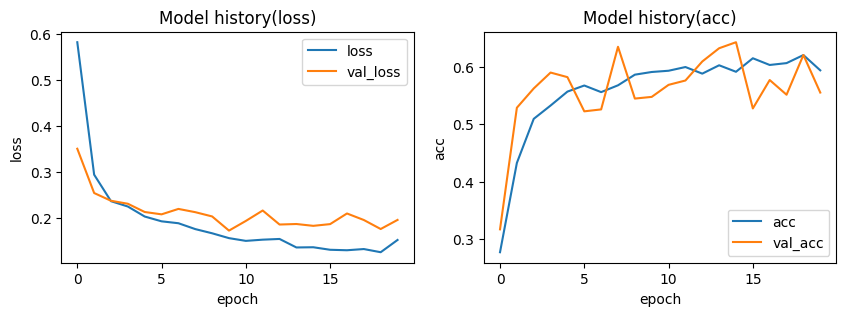

In [57]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'acc']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [61]:
# 성능 평가
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

107/107 [==============================] - 31s 289ms/step - loss: 0.1850 - acc: 0.5568
Test accuracy: 0.5567915439605713


# **6. 모델 예측**

In [100]:
pred = model.predict(test_generator)

107/107 [==============================] - 27s 254ms/step


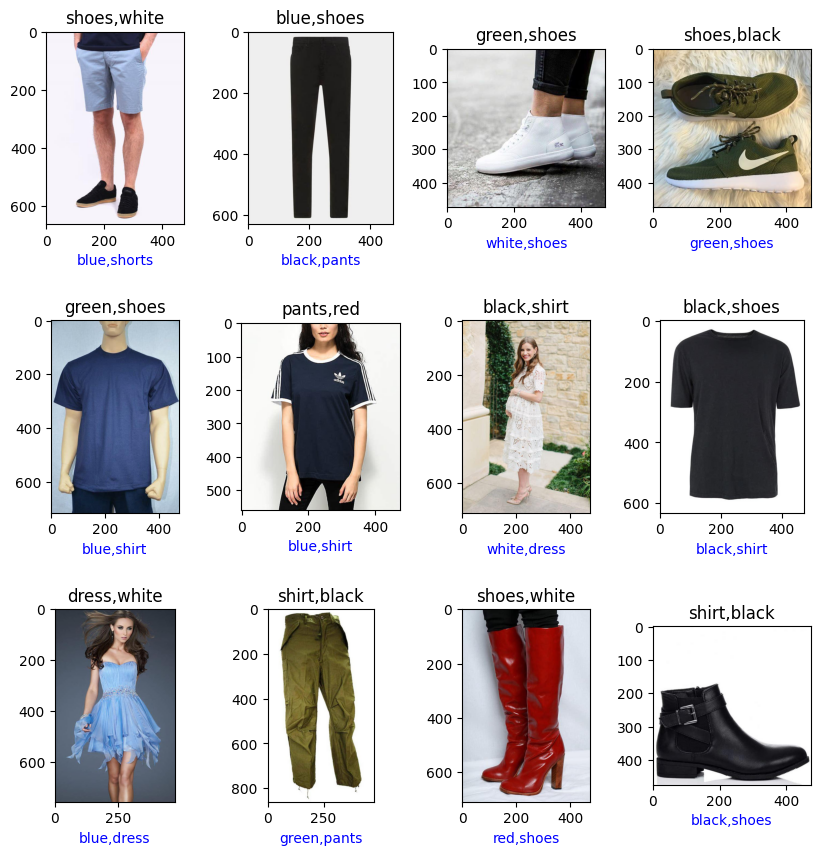

In [103]:
from PIL import Image

fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, temp in enumerate(pred[:12]):
    idx = temp.argsort()[-2:]
    pred_label = [class_col[x] for x in idx]
    answer = test_data.iloc[i,1:][test_data.iloc[i,1:] == 1].index

    img_path = os.path.join(folder_path,test_data['image'][i])
    img = Image.open(img_path)

    ax = plt.subplot(3, 4, i+1)

    ax.imshow(img)
    ax.set_title(f'{pred_label[0]},{pred_label[1]}')
    ax.set_xlabel(f'{answer[0]},{answer[1]}', color='blue')
